# Chapter 13  



# Image Processing Techniques I  



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_canvas(height=500, width=500, bgColor=0):
    # create the image (canvas)
    canvas = np.zeros((height, width, 3), dtype='uint8')
    if bgColor != 0:
        canvas[:] = bgColor
    return canvas

def toRGB(img):
    return img[:,:,::-1]
    
def show_in_matplotlib(img, figsize=(6,8), title=None):
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    # imgRGB = toRGB(img)
    plt.figure(figsize=figsize)
    
    plt.imshow(imgRGB)
    plt.title(title)
    plt.show()



### Create a color pallete

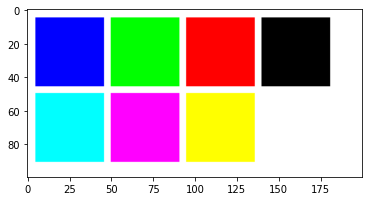

In [2]:
import cv2 as cv

img = create_canvas(100,200,(255,255,255))

s = 40
p = 5 #padding
r=0
(l,t) = (r+p,p)
(r,b) = (l+s,t+s)
cv.rectangle(img, (l,t),(r,b), (255,0,0), -1)

(l,t) = (r+p,p)
(r,b) = (l+s,t+s)
cv.rectangle(img, (l,t),(r,b), (0,255,0), -1)

(l,t) = (r+p,p)
(r,b) = (l+s,t+s)
cv.rectangle(img, (l,t),(r,b), (0,0,255), -1)

(l,t) = (r+p,p)
(r,b) = (l+s,t+s)
cv.rectangle(img, (l,t),(r,b), (0,0,0), -1)

r=0
p=50
(l,t) = (r+5,p)
(r,b) = (l+s,t+s)
cv.rectangle(img, (l,t),(r,b), (255,255,0), -1)

(l,t) = (r+5,p)
(r,b) = (l+s,t+s)
cv.rectangle(img, (l,t),(r,b), (255,0,255), -1)

(l,t) = (r+5,p)
(r,b) = (l+s,t+s)
cv.rectangle(img, (l,t),(r,b), (0,255,255), -1)

(l,t) = (r+5,p)
(r,b) = (l+s,t+s)
cv.rectangle(img, (l,t),(r,b), (255,255,255), -1)

cv.imwrite('color_img.png', img )

show_in_matplotlib(img, None)



## Class Activity
Create the above color palete with each color of square 50x50 and silver background.

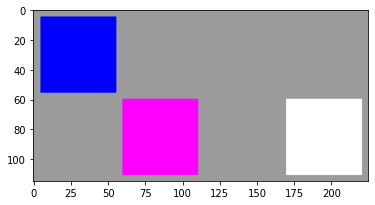

In [3]:
import cv2 as cv

squareSize = 50
padding = 5
nrows = 2
ncols = 4

# silver or gray background
height = (nrows * squareSize) + ((nrows+1)*padding)
width = (ncols * squareSize) + ((ncols+1)*padding)
bgColor = (155,155,155)

img = create_canvas(height,width, bgColor)

# blue
cv.rectangle(img, (5,5),(5+50,5+50), (255,0,0), -1)

# magenta
cv.rectangle(img, (60,60),(60+50,60+50), (255,0,255), -1)

# white
l = 170
t = 60
r = l + squareSize
b = t + squareSize
cv.rectangle(img, (l,t),(r,b), (255,255,255), -1)

show_in_matplotlib(img, None)

# Example

Create a pallete of 16 random colors in square shape.

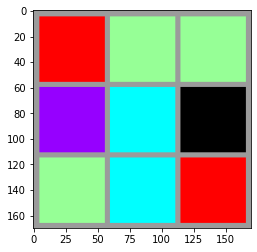

In [4]:
import cv2 as cv
import random

squareSize = 50
padding = 5
nrows = 3
ncols = 3

# silver or gray background
height = (nrows * squareSize) + ((nrows+1)*padding)
width = (ncols * squareSize) + ((ncols+1)*padding)
bgColor = (155,155,155)

img = create_canvas(height,width, bgColor)

b = 0
# draw each row of square color
for i in range(nrows):
    # start each row at point 0 on the right
    r = 0
    # start each row at the top at point bottom + padding
    t = b + padding
    # bottom of the square
    b = t + squareSize

    # draw each square per column on a row
    for j in range(ncols):
        l = r + padding        
        r = l + squareSize        
        color = random.choices([0,150,255])[0],random.choices([0,150,255])[0],random.choices([0,150,255])[0]
        # color = random.randint(0,255), random.randint(0,255), random.randint(0,255)
        cv.rectangle(img, (l,t),(r,b), color=color,thickness= -1)

# save the image
cv.imwrite(f'color_img_{nrows}x{ncols}.png', img )

show_in_matplotlib(img, None)

Display color pallete

In [55]:
import cv2 as cv

img = cv.imread('color_img.png')

cv.imshow("Color Pallete", img)

cv.waitKey(0)
cv.destroyAllWindows()

Read and display the image (png) file you created.

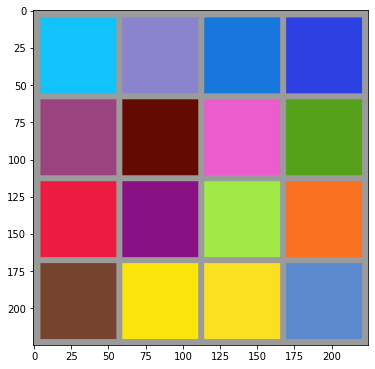

In [57]:
import cv2 as cv

img = cv.imread('color_img_4x4.png')

show_in_matplotlib(img)

## Splitting and Merging Channels

Expensive splitting method

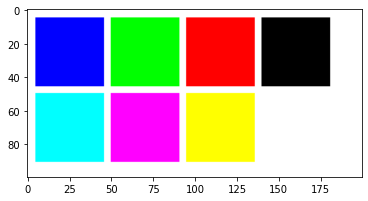

In [7]:
import cv2 as cv

img = cv.imread('color_img.png')

(b, g, r) = cv.split(img)

img_merged = cv.merge((b,g,r))

show_in_matplotlib(img_merged)

Better splitting method

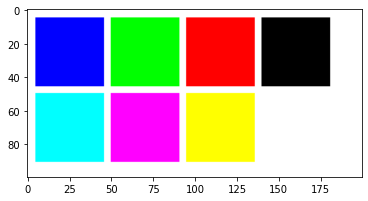

In [8]:
import cv2 as cv

img = cv.imread('color_img.png')

b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

img_merged = cv.merge((b,g,r))

show_in_matplotlib(img_merged)

Image without blue

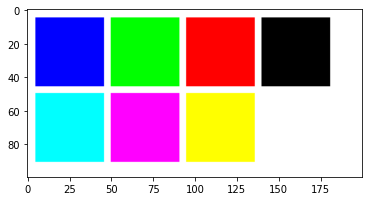

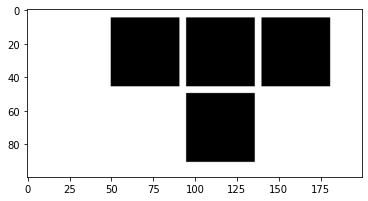

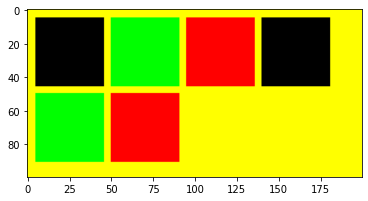

In [67]:
import cv2 as cv

img = cv.imread('color_img.png')

show_in_matplotlib(img)

b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

show_in_matplotlib(b)

b[:] = 0
img_merged = cv.merge((b,g,r))
show_in_matplotlib(img_merged)


Remove blue channel from image.

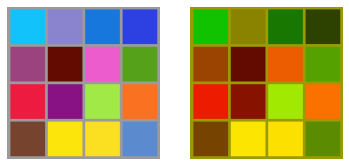

In [68]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('color_img_4x4.png')

imgNoBlue = img.copy()
imgNoBlue[:,:,0] = 0

# show original
plt.subplot(1,2,1)
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)
plt.axis('off')

# show no blue
plt.subplot(1,2,2)
imgRGB = imgNoBlue[:,:,::-1]
plt.imshow(imgRGB)
plt.axis('off')

# 
plt.show()


Image without green

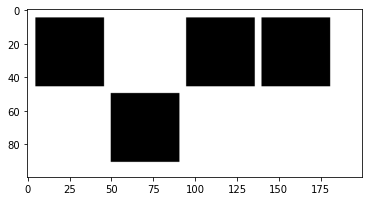

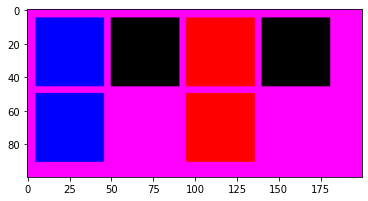

In [10]:
import cv2 as cv

img = cv.imread('color_img.png')

b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

show_in_matplotlib(g)

g[:] = 0
img_merged = cv.merge((b,g,r))
show_in_matplotlib(img_merged)


Remove the green

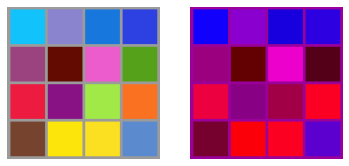

In [63]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('color_img_4x4.png')

imgNoGreen = img.copy()
imgNoGreen[:,:,1] = 0

# show original
plt.subplot(1,2,1)
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)
plt.axis('off')

# show no blue
plt.subplot(1,2,2)
imgRGB = imgNoGreen[:,:,::-1]
plt.imshow(imgRGB)
plt.axis('off')

# 
plt.show()


Image without red

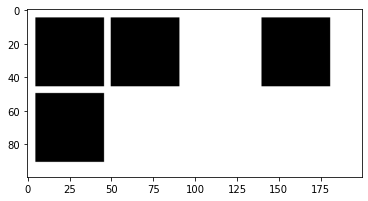

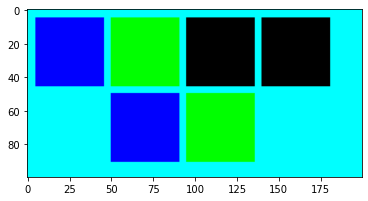

In [11]:
import cv2 as cv

img = cv.imread('color_img.png')

b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

show_in_matplotlib(r)

r[:] = 0
img_merged = cv.merge((b,g,r))
show_in_matplotlib(img_merged)


Removing the red

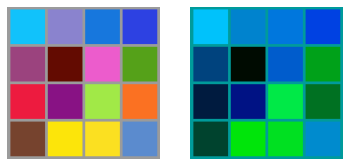

In [69]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('color_img_4x4.png')

imgNoRed = img.copy()
imgNoRed[:,:,2] = 0

# show original
plt.subplot(1,2,1)
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)
plt.axis('off')

# show no blue
plt.subplot(1,2,2)
imgRGB = imgNoRed[:,:,::-1]
plt.imshow(imgRGB)
plt.axis('off')

# 
plt.show()


## Scaling an Image

### Resize by specifying width and height

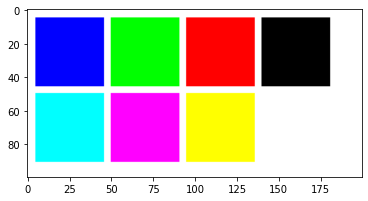

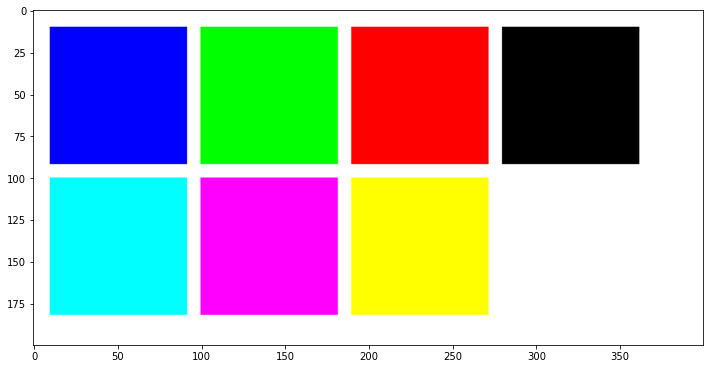

In [12]:
import cv2 as cv

img = cv.imread('color_img.png')

show_in_matplotlib(img)

(height, width) = img.shape[:2]

img_resized = cv.resize(img, (width * 2, height * 2), interpolation=cv.INTER_AREA)
show_in_matplotlib(img_resized, (12,16))


### Resize by specifying factors

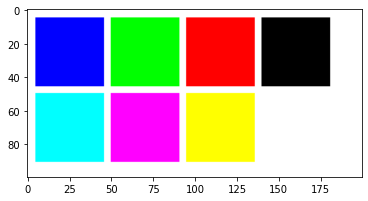

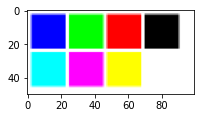

In [13]:
import cv2 as cv

img = cv.imread('color_img.png')

show_in_matplotlib(img)

img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_LINEAR)
show_in_matplotlib(img_resized, (3,4))


### Compare reduction interpolation methods

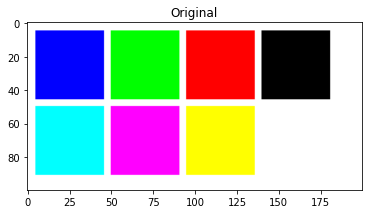

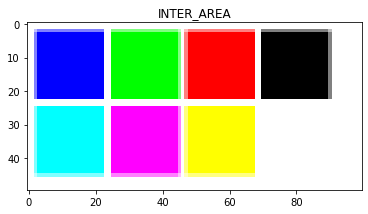

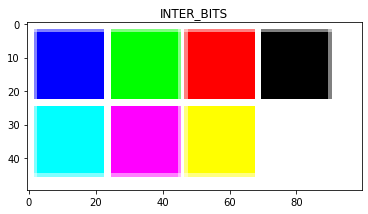

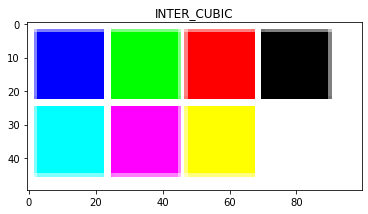

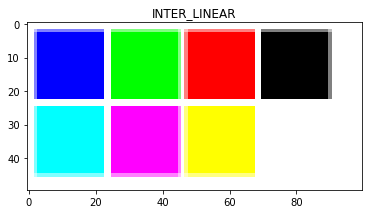

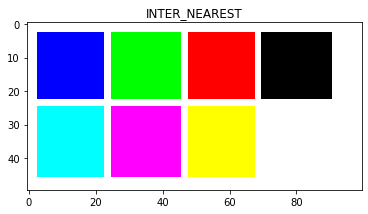

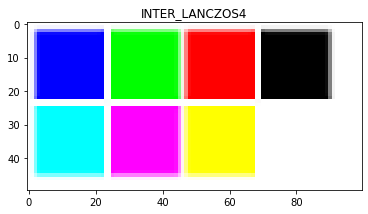

In [14]:
import cv2 as cv

img = cv.imread('color_img.png')

show_in_matplotlib(img, title="Original")

img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_AREA)
show_in_matplotlib(img_resized, title="INTER_AREA")
img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_BITS)
show_in_matplotlib(img_resized, title="INTER_BITS")
img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_CUBIC)
show_in_matplotlib(img_resized, title="INTER_CUBIC")
img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_LINEAR)
show_in_matplotlib(img_resized, title="INTER_LINEAR")
img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_NEAREST)
show_in_matplotlib(img_resized, title="INTER_NEAREST")
img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_LANCZOS4)
show_in_matplotlib(img_resized, title="INTER_LANCZOS4")


# Example

1. Resize the color_img_4x4 by doubling is size using any of the interpolation mode.
2. Identify the best result.

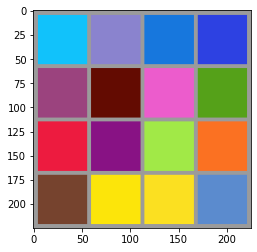

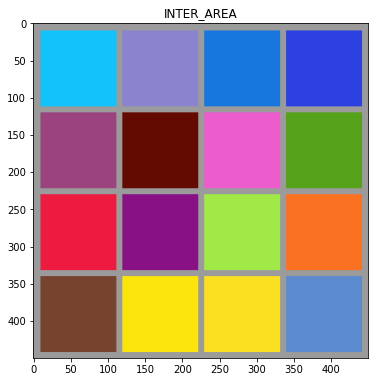

In [78]:
# to read image
import cv2 as cv 
# to display image
import matplotlib.pyplot as plt

filePath = 'color_img_4x4.png'

# read the image file
img = cv.imread(filePath)

# display image
# convert to RGB
imgRGB = img[:,:,::-1]
# show image
plt.imshow(imgRGB)

# show and clean up pyplot resources
plt.show()

img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_AREA)
show_in_matplotlib(img_resized, title="INTER_AREA")
# img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
# show_in_matplotlib(img_resized, title="INTER_CUBIC")
# img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_NEAREST)
# show_in_matplotlib(img_resized, title="INTER_NEAREST")
# img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_LINEAR)
# show_in_matplotlib(img_resized, title="INTER_LINEAR")
# img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_BITS)
# show_in_matplotlib(img_resized, title="INTER_BITS")
# img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_LANCZOS4)
# show_in_matplotlib(img_resized, title="INTER_LANCZOS4")



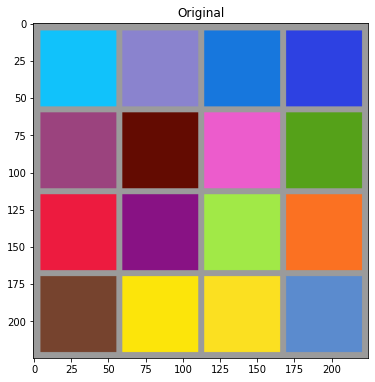

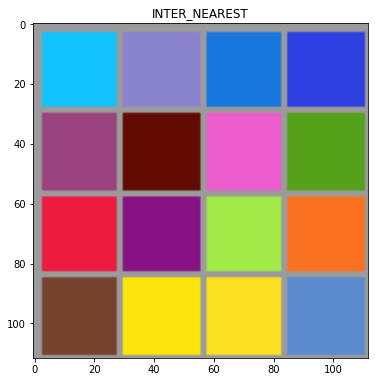

In [80]:
import cv2 as cv

img = cv.imread('color_img_4x4.png')

show_in_matplotlib(img, title="Original")

img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_NEAREST)
show_in_matplotlib(img_resized, title="INTER_NEAREST")
# img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_AREA)
# show_in_matplotlib(img_resized, title="INTER_AREA")
# img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_BITS)
# show_in_matplotlib(img_resized, title="INTER_BITS")
# img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_CUBIC)
# show_in_matplotlib(img_resized, title="INTER_CUBIC")
# img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_LINEAR)
# show_in_matplotlib(img_resized, title="INTER_LINEAR")
# img_resized = cv.resize(img, None, fx=.5, fy=.5, interpolation=cv.INTER_LANCZOS4)
# show_in_matplotlib(img_resized, title="INTER_LANCZOS4")


### Compare enlarge with interpolation methods

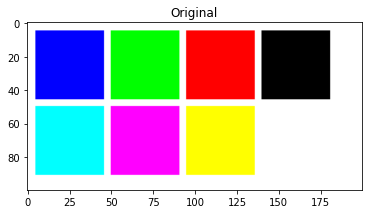

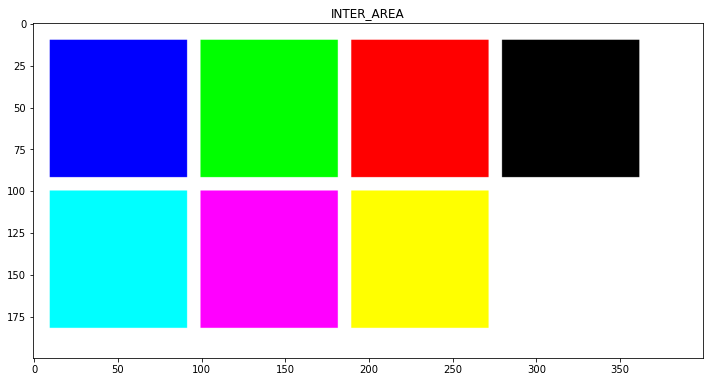

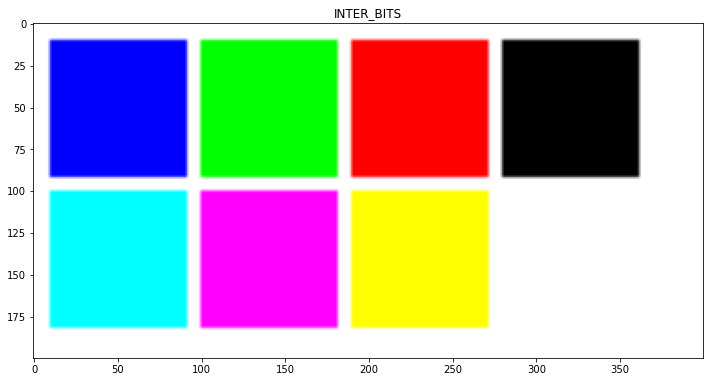

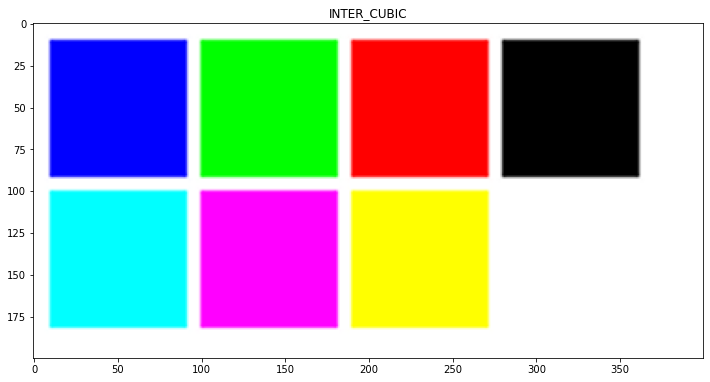

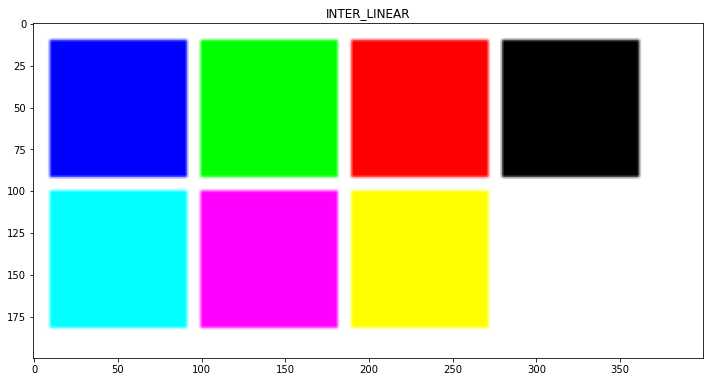

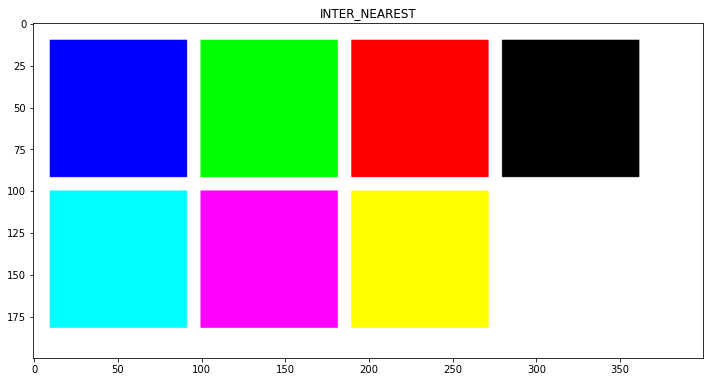

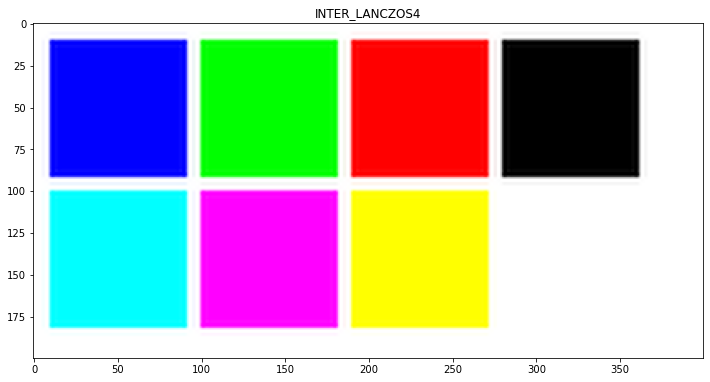

In [15]:
import cv2 as cv

img = cv.imread('color_img.png')

show_in_matplotlib(img, title="Original")

img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_AREA)
show_in_matplotlib(img_resized, (12,18), title="INTER_AREA")
img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_BITS)
show_in_matplotlib(img_resized, (12,18), title="INTER_BITS")
img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
show_in_matplotlib(img_resized, (12,18), title="INTER_CUBIC")
img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_LINEAR)
show_in_matplotlib(img_resized, (12,18), title="INTER_LINEAR")
img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_NEAREST)
show_in_matplotlib(img_resized, (12,18), title="INTER_NEAREST")
img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_LANCZOS4)
show_in_matplotlib(img_resized, (12,18), title="INTER_LANCZOS4")


### Translating an image

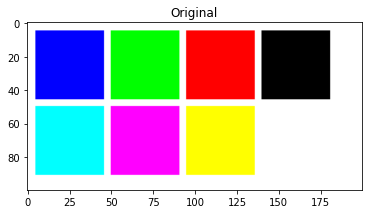

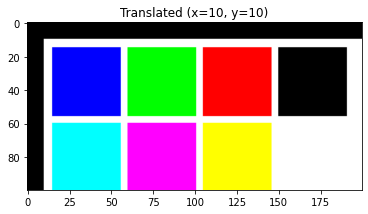

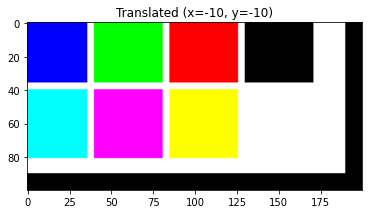

In [18]:
import cv2 as cv

img = cv.imread('color_img.png')

show_in_matplotlib(img, title="Original")

# get size of image
(height, width) = img.shape[:2]

x = 10
y = 10
M = np.float32([[1, 0, x], [0, 1, y]])

img_tran = cv.warpAffine(img, M, (width, height))
show_in_matplotlib(img_tran, title="Translated (x=10, y=10)")

x = -10
y = -10
M = np.float32([[1, 0, x], [0, 1, y]])
img_tran = cv.warpAffine(img, M, (width, height))
show_in_matplotlib(img_tran, title="Translated (x=-10, y=-10)")


# Class Activity

Translate the image ca[.ext] by x= -10 and y = -10.

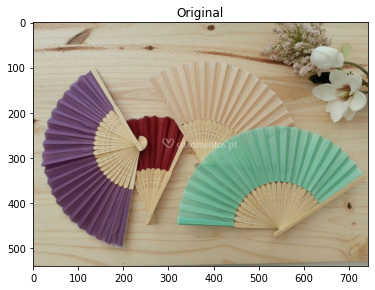

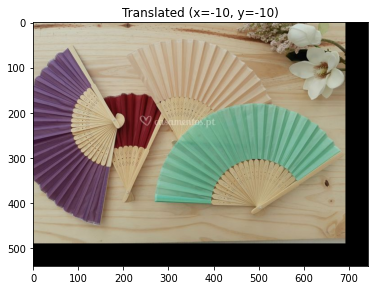

In [82]:
import cv2 as cv

img = cv.imread('assets/ca.jpg')

show_in_matplotlib(img, title="Original")

# get size of image
(height, width) = img.shape[:2]

# x = 10
# y = 10
# M = np.float32([[1, 0, x], [0, 1, y]])

# img_tran = cv.warpAffine(img, M, (width, height))
# show_in_matplotlib(img_tran, title="Translated (x=10, y=10)")

x = -50
y = -50
M = np.float32([[1, 0, x], [0, 1, y]])
img_tran = cv.warpAffine(img, M, (width, height))
show_in_matplotlib(img_tran, title="Translated (x=-10, y=-10)")


### Rotate an Image

Images are rotated anti-clockwise

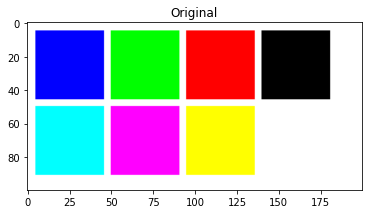

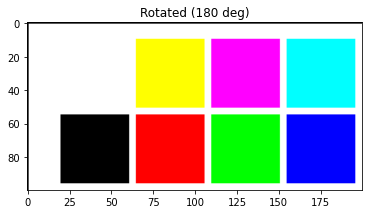

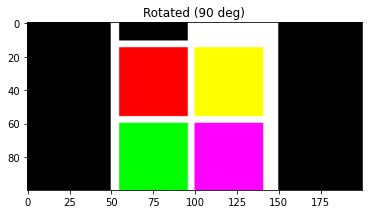

In [25]:
import cv2 as cv

img = cv.imread('color_img.png')

show_in_matplotlib(img, title="Original")

# get size of image
(height, width) = img.shape[:2]

center = (width / 2.0, height / 2.0)
deg = 180
# getRotationMatrix2D(center, degree)
M = cv.getRotationMatrix2D(center, deg, 1)
img_rot = cv.warpAffine(img, M, (width, height))
show_in_matplotlib(img_rot, title=f"Rotated ({deg} deg)")

center = (width / 2.0, height / 2.0)
deg = 90
M = cv.getRotationMatrix2D(center, deg, 1)
img_rot = cv.warpAffine(img, M, (width, height))
show_in_matplotlib(img_rot, title=f"Rotated ({deg} deg)")


# Example
1. Rotate image ca[.ext] by 45 deg


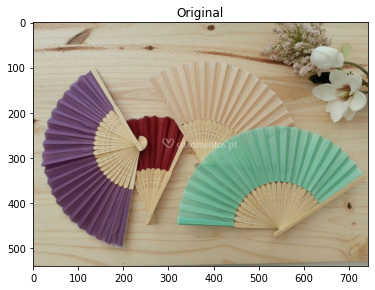

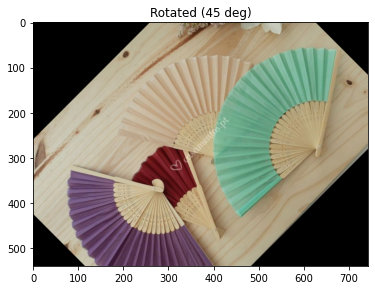

In [3]:
import cv2 as cv

img = cv.imread('assets/ca.jpg')

show_in_matplotlib(img, title="Original")

# get size of image
(height, width) = img.shape[:2]

center = (width/2.0, height/2.0)
deg = 45

M = cv.getRotationMatrix2D(center, deg, 1)
img_rot = cv.warpAffine(img, M, (width, height))
show_in_matplotlib(img_rot, title=f"Rotated ({deg} deg)")

# Class Activity
1. Rotate image ca[.ext] by 60 deg
1. Rotate image ca[.ext] by 115 deg
1. Rotate image ca[.ext] by 230 deg


### Affine transformation

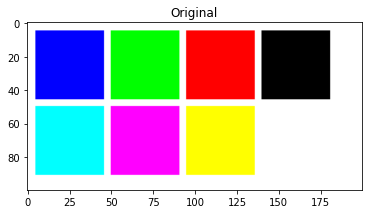

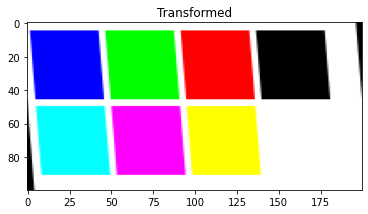

In [33]:
import cv2 as cv

img = cv.imread('color_img.png')

show_in_matplotlib(img, title="Original")

# get size of image
(height, width) = img.shape[:2]

pts_1 = np.float32([[135, 45], [385, 45], [135, 230]])
pts_2 = np.float32([[135, 45], [385, 45], [150, 230]])
M = cv.getAffineTransform(pts_1, pts_2)
img_tfm = cv.warpAffine(img, M, (width, height))

show_in_matplotlib(img_tfm, title=f"Transformed")


# Example

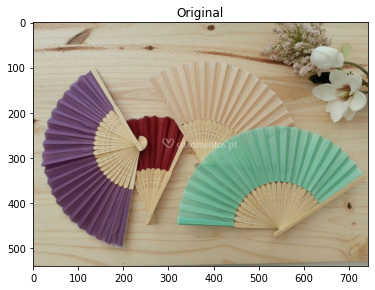

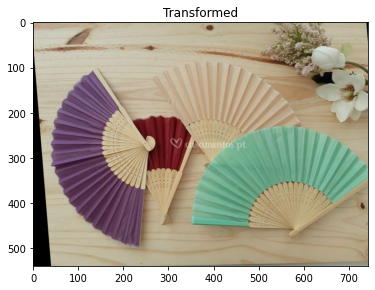

In [4]:
import cv2 as cv

img = cv.imread('assets/ca.jpg')

show_in_matplotlib(img, title="Original")

# get size of image
(height, width) = img.shape[:2]

pts_1 = np.float32([[135, 45], [385, 45], [135, 230]])
pts_2 = np.float32([[135, 45], [385, 45], [150, 230]])
M = cv.getAffineTransform(pts_1, pts_2)
img_tfm = cv.warpAffine(img, M, (width, height))

show_in_matplotlib(img_tfm, title=f"Transformed")


# Practice

Experiment with the value for the tranformation point.

### Perspective tranformation

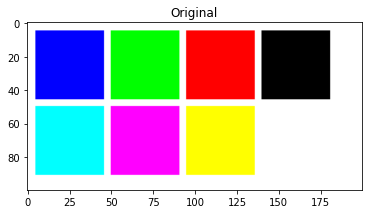

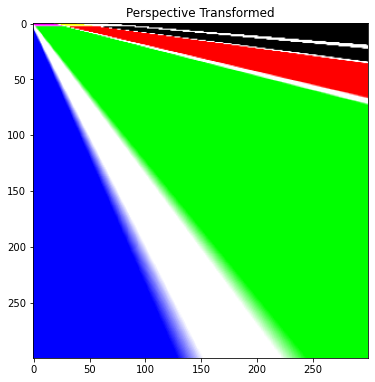

In [37]:
import cv2 as cv

img = cv.imread('color_img.png')

show_in_matplotlib(img, title="Original")

# get size of image
(height, width) = img.shape[:2]

pts_1 = np.float32([[50, 65], [117, 65], [41, 14], [52, 14]])
pts_2 = np.float32([[0, 0], [30, 0], [0, 30], [30, 30]])
M = cv.getPerspectiveTransform(pts_1, pts_2)
img_pers_tfm = cv.warpPerspective(img, M, (300, 300))

show_in_matplotlib(img_pers_tfm, title=f"Perspective Transformed")


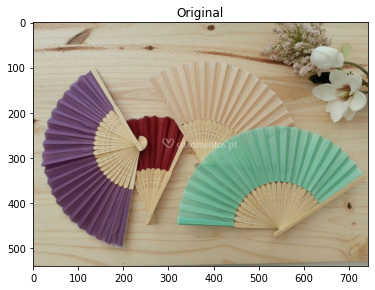

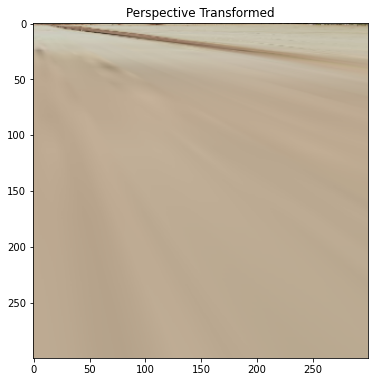

In [5]:
import cv2 as cv

img = cv.imread('assets/ca.jpg')

show_in_matplotlib(img, title="Original")

# get size of image
(height, width) = img.shape[:2]

pts_1 = np.float32([[50, 65], [117, 65], [41, 14], [52, 14]])
pts_2 = np.float32([[0, 0], [30, 0], [0, 30], [30, 30]])
M = cv.getPerspectiveTransform(pts_1, pts_2)
img_pers_tfm = cv.warpPerspective(img, M, (300, 300))

show_in_matplotlib(img_pers_tfm, title=f"Perspective Transformed")


### Cropping

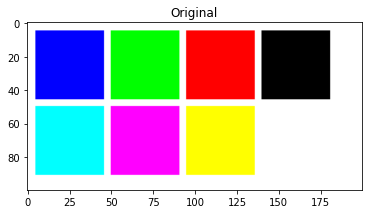

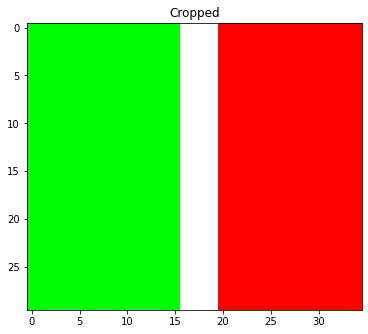

In [42]:
import cv2 as cv

img = cv.imread('color_img.png')

show_in_matplotlib(img, title="Original")

# get size of image
(height, width) = img.shape[:2]

img_cropped = img[10:40, 75:110]

show_in_matplotlib(img_cropped, title=f"Cropped")


## Class Activity

Crop the ca.[ext] image at 50% from the center to the 4 sides.

## Filtering an Image

### Smoothing by arbitrary kernels.

In [6]:
k=5
np.ones((k, k), np.float32) / k**2

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

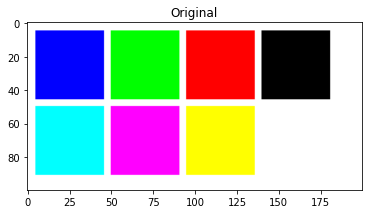

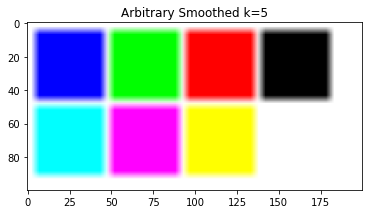

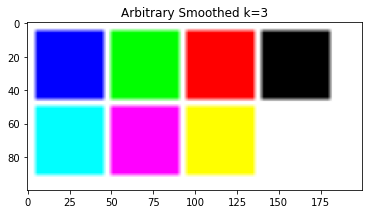

In [57]:
import cv2 as cv

img = cv.imread('color_img.png')

show_in_matplotlib(img, title="Original")

# kernel size
k = 5
kernel_averaging = np.ones((k, k), np.float32) / k**2
img_smooth = cv.filter2D(img, -1, kernel_averaging)
show_in_matplotlib(img_smooth, title=f"Arbitrary Smoothed k={k}")

k = 3
kernel_averaging = np.ones((k, k), np.float32) / k**2
img_smooth = cv.filter2D(img, -1, kernel_averaging)
show_in_matplotlib(img_smooth, title=f"Arbitrary Smoothed k={k}")


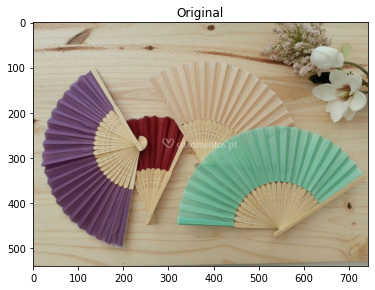

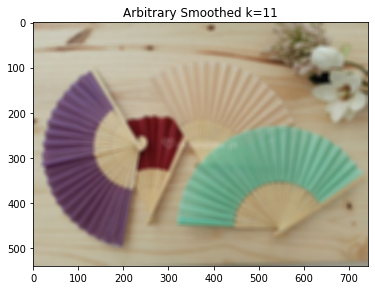

In [9]:
import cv2 as cv

img = cv.imread('assets/ca.jpg')

show_in_matplotlib(img, title="Original")

# kernel size
k = 11
kernel_averaging = np.ones((k, k), np.float32) / k**2
img_smooth = cv.filter2D(img, -1, kernel_averaging)
show_in_matplotlib(img_smooth, title=f"Arbitrary Smoothed k={k}")



### Common Filtering Techniques.

Smoothing operation are used to reduce noise and reduce pixel effect in low-resolution images.

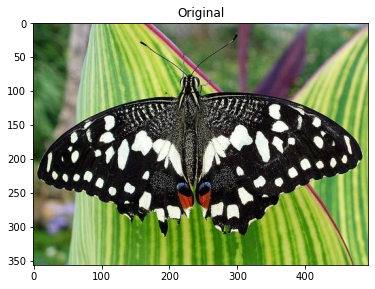

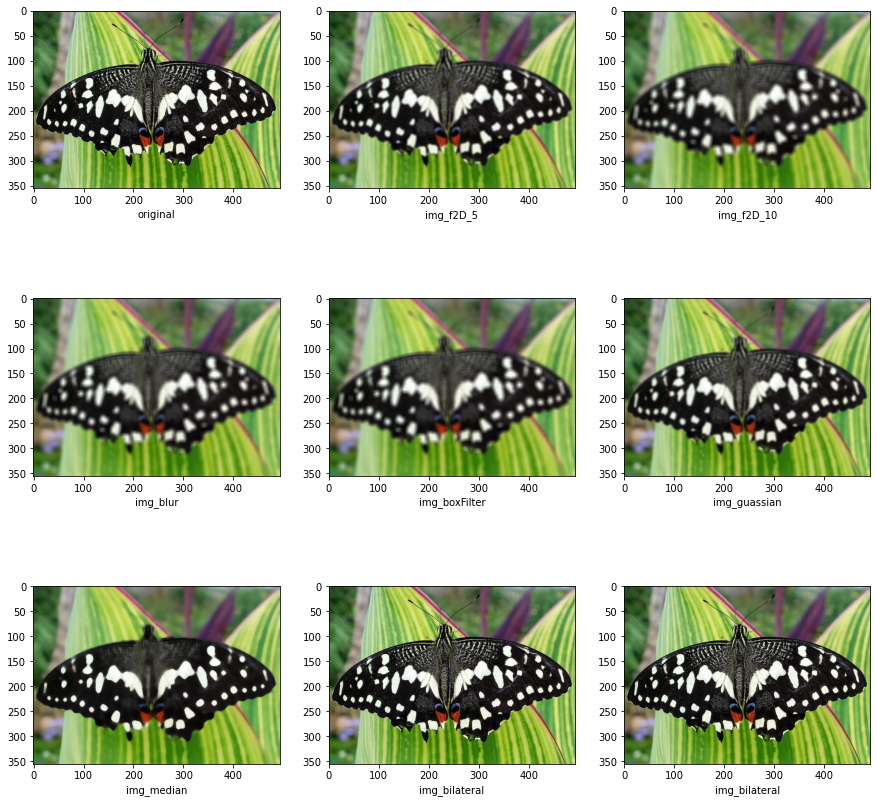

In [66]:
import cv2 as cv

img = cv.imread('../samples/data/butterfly.jpg')

show_in_matplotlib(img, title="Original")

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
plt.subplot(3,3,1)
plt.imshow(toRGB(img))
plt.xlabel('original')

# k=5
k = 5
kernel_averaging = np.ones((k, k), np.float32) / k**2
img_f2D_5 = cv.filter2D(img, -1, kernel_averaging)
plt.subplot(3,3,2)
plt.imshow(toRGB(img_f2D_5))
plt.xlabel('img_f2D_5')

# k=10
k = 9
kernel_averaging = np.ones((k, k), np.float32) / k**2
img_f2D_10 = cv.filter2D(img, -1, kernel_averaging)
plt.subplot(3,3,3)
plt.imshow(toRGB(img_f2D_10))
plt.xlabel('img_f2D_10')

# blur
img_blur = cv.blur(img, (k,k))
plt.subplot(3,3,4)
plt.imshow(toRGB(img_blur))
plt.xlabel('img_blur')

# boxFilter
img_boxFilter = cv.boxFilter(img, -1, (k,k), normalize=True)
plt.subplot(3,3,5)
plt.imshow(toRGB(img_boxFilter))
plt.xlabel('img_boxFilter')

# guassian
img_guassian = cv.GaussianBlur(img, (k,k), 0)
plt.subplot(3,3,6)
plt.imshow(toRGB(img_guassian))
plt.xlabel('img_guassian')

# median
# reduce salt-and-pepper noise
img_median = cv.medianBlur(img, 9)
plt.subplot(3,3,7)
plt.imshow(toRGB(img_median))
plt.xlabel('img_median')

# bilateral
# reduce noise and keep edge sharp
img_bilateral = cv.bilateralFilter(img, 5, 10,10)
plt.subplot(3,3,8)
plt.imshow(toRGB(img_bilateral))
plt.xlabel('img_bilateral')

# bilateral
# reduce noise and keep edge sharp
img_bilateral = cv.bilateralFilter(img, 5, 20, 20)
plt.subplot(3,3,9)
plt.imshow(toRGB(img_bilateral))
plt.xlabel('img_bilateral')

plt.show()


## Class Activity

Apply all the filter to the ca.[ext] image.


In [ ]:
import cv2 as cv

img = cv.imread('../samples/data/butterfly.jpg')

show_in_matplotlib(img, title="Original")

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
plt.subplot(3,3,1)
plt.imshow(toRGB(img))
plt.xlabel('original')

# k=5
k = 5
kernel_averaging = np.ones((k, k), np.float32) / k**2
img_f2D_5 = cv.filter2D(img, -1, kernel_averaging)
plt.subplot(3,3,2)
plt.imshow(toRGB(img_f2D_5))
plt.xlabel('img_f2D_5')

# k=10
k = 9
kernel_averaging = np.ones((k, k), np.float32) / k**2
img_f2D_10 = cv.filter2D(img, -1, kernel_averaging)
plt.subplot(3,3,3)
plt.imshow(toRGB(img_f2D_10))
plt.xlabel('img_f2D_10')

# blur
img_blur = cv.blur(img, (k,k))
plt.subplot(3,3,4)
plt.imshow(toRGB(img_blur))
plt.xlabel('img_blur')

# boxFilter
img_boxFilter = cv.boxFilter(img, -1, (k,k), normalize=True)
plt.subplot(3,3,5)
plt.imshow(toRGB(img_boxFilter))
plt.xlabel('img_boxFilter')

# guassian
img_guassian = cv.GaussianBlur(img, (k,k), 0)
plt.subplot(3,3,6)
plt.imshow(toRGB(img_guassian))
plt.xlabel('img_guassian')

# median
# reduce salt-and-pepper noise
img_median = cv.medianBlur(img, 9)
plt.subplot(3,3,7)
plt.imshow(toRGB(img_median))
plt.xlabel('img_median')

# bilateral
# reduce noise and keep edge sharp
img_bilateral = cv.bilateralFilter(img, 5, 10,10)
plt.subplot(3,3,8)
plt.imshow(toRGB(img_bilateral))
plt.xlabel('img_bilateral')

# bilateral
# reduce noise and keep edge sharp
img_bilateral = cv.bilateralFilter(img, 5, 20, 20)
plt.subplot(3,3,9)
plt.imshow(toRGB(img_bilateral))
plt.xlabel('img_bilateral')

plt.show()


## Image Sharpening

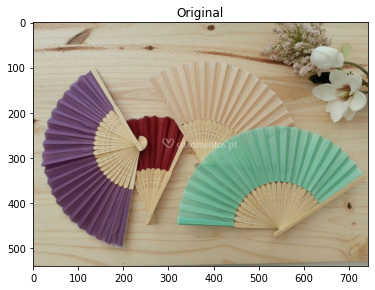

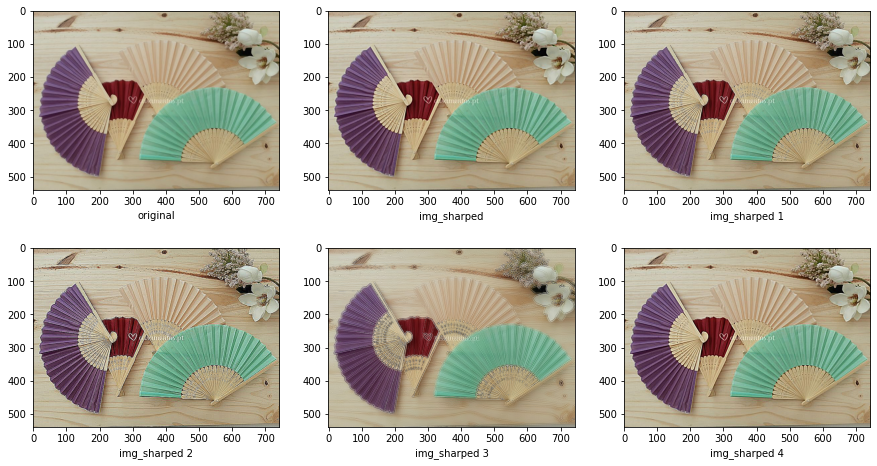

In [10]:
import cv2 as cv

img = cv.imread('assets/ca.jpg')

show_in_matplotlib(img, title="Original")

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

nrows = 2
ncols = 3
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img))
plt.xlabel('original')

# sharped by guassian then substract from original
k = 9
img_guassian = cv.GaussianBlur(img, (k,k), 10)
img_sharped = cv.addWeighted(img, 1.5, img_guassian, -0.5, 0)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_sharped))
plt.xlabel('img_sharped')

# sharpKernel
sharpKernel =[]
img_sharped =[]

j=0
sharpKernel.append(np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]]))
img_sharped.insert(j, cv.filter2D(img, -1, sharpKernel[j]))
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_sharped[j]))
plt.xlabel(f'img_sharped {j+1}')

j += 1
sharpKernel.append( np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]]))
img_sharped.insert(j, cv.filter2D(img, -1, sharpKernel[j]))
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_sharped[j]))
plt.xlabel(f'img_sharped {j+1}')


j += 1
sharpKernel.append(np.array([[1, 1, 1],
                             [1, -7, 1],
                             [1, 1, 1]]))
img_sharped.insert(j, cv.filter2D(img, -1, sharpKernel[j]))
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_sharped[j]))
plt.xlabel(f'img_sharped {j+1}')


j += 1
sharpKernel.append( np.array([[-1, -1, -1, -1, -1],
                             [-1, 2, 2, 2, -1],
                             [-1, 2, 8, 2, -1],
                             [-1, 2, 2, 2, -1],
                             [-1, -1, -1, -1, -1]]) / 8.0)
img_sharped.insert(j, cv.filter2D(img, -1, sharpKernel[j]))
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_sharped[j]))
plt.xlabel(f'img_sharped {j+1}')

plt.show()


## Applying different kernel

### Identify kernel

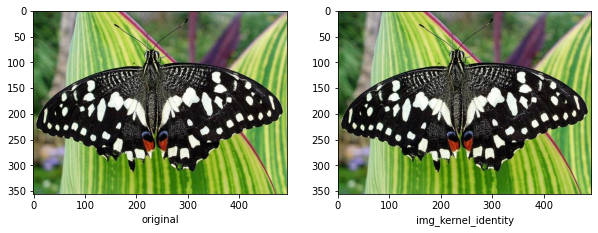

In [85]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../samples/data/butterfly.jpg')

# show_in_matplotlib(img, title="Original")

plt.figure(figsize=(10,8))

nrows = 1
ncols = 2
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img))
plt.xlabel('original')

# Identify kernel (does not modify the image)
kernel_identity = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])
img_kernel_identity = cv.filter2D(img, -1, kernel_identity)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_kernel_identity))
plt.xlabel('img_kernel_identity')


plt.show()


### Edge detection

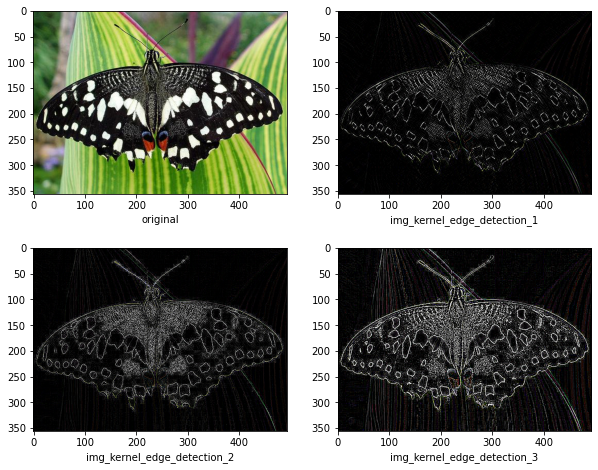

In [82]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../samples/data/butterfly.jpg')

# show_in_matplotlib(img, title="Original")

plt.figure(figsize=(10,8))

nrows = 2
ncols = 2
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img))
plt.xlabel('original')

# Try different kernels for edge detection:
kernel_edge_detection_1 = np.array([[1, 0, -1],
                                    [0, 0, 0],
                                    [-1, 0, 1]])
img_kernel_edge_detection_1 = cv.filter2D(img, -1, kernel_edge_detection_1)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_kernel_edge_detection_1))
plt.xlabel('img_kernel_edge_detection_1')


kernel_edge_detection_2 = np.array([[0, 1, 0],
                                    [1, -4, 1],
                                    [0, 1, 0]])
img_kernel_edge_detection_2 = cv.filter2D(img, -1, kernel_edge_detection_2)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_kernel_edge_detection_2))
plt.xlabel('img_kernel_edge_detection_2')

kernel_edge_detection_3 = np.array([[-1, -1, -1],
                                    [-1, 8, -1],
                                    [-1, -1, -1]])
img_kernel_edge_detection_3 = cv.filter2D(img, -1, kernel_edge_detection_3)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_kernel_edge_detection_3))
plt.xlabel('img_kernel_edge_detection_3')


plt.show()


## Class Activity

Apply edge detection to ca.[ext] image.


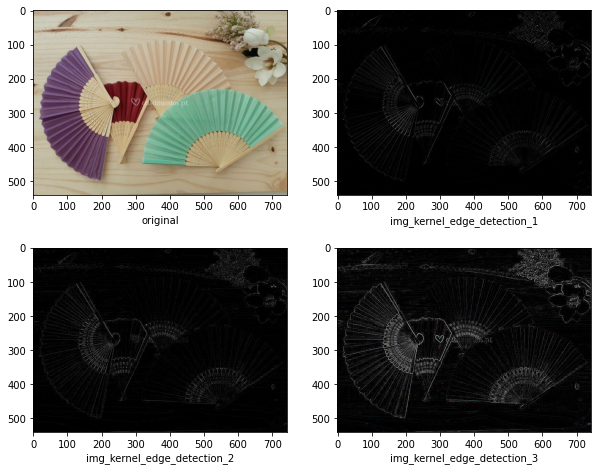

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('assets/ca.jpg')

# show_in_matplotlib(img, title="Original")

plt.figure(figsize=(10,8))

nrows = 2
ncols = 2
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img))
plt.xlabel('original')

# Try different kernels for edge detection:
kernel_edge_detection_1 = np.array([[1, 0, -1],
                                    [0, 0, 0],
                                    [-1, 0, 1]])
img_kernel_edge_detection_1 = cv.filter2D(img, -1, kernel_edge_detection_1)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_kernel_edge_detection_1))
plt.xlabel('img_kernel_edge_detection_1')


kernel_edge_detection_2 = np.array([[0, 1, 0],
                                    [1, -4, 1],
                                    [0, 1, 0]])
img_kernel_edge_detection_2 = cv.filter2D(img, -1, kernel_edge_detection_2)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_kernel_edge_detection_2))
plt.xlabel('img_kernel_edge_detection_2')

kernel_edge_detection_3 = np.array([[-1, -1, -1],
                                    [-1, 8, -1],
                                    [-1, -1, -1]])
img_kernel_edge_detection_3 = cv.filter2D(img, -1, kernel_edge_detection_3)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_kernel_edge_detection_3))
plt.xlabel('img_kernel_edge_detection_3')


plt.show()


### Sharpening

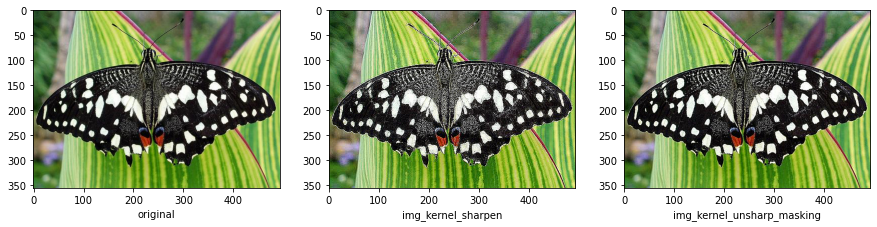

In [83]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../samples/data/butterfly.jpg')

# show_in_matplotlib(img, title="Original")

plt.figure(figsize=(15,8))

nrows = 1
ncols = 3
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img))
plt.xlabel('original')

# Try different kernels for sharpening:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
img_kernel_sharpen = cv.filter2D(img, -1, kernel_sharpen)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_kernel_sharpen))
plt.xlabel('img_kernel_sharpen')


kernel_unsharp_masking = -1 / 256 * np.array([[1, 4, 6, 4, 1],
                                              [4, 16, 24, 16, 4],
                                              [6, 24, -476, 24, 6],
                                              [4, 16, 24, 16, 4],
                                              [1, 4, 6, 4, 1]])
img_kernel_unsharp_masking = cv.filter2D(img, -1, kernel_unsharp_masking)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_kernel_unsharp_masking))
plt.xlabel('img_kernel_unsharp_masking')

plt.show()


### Smoothing

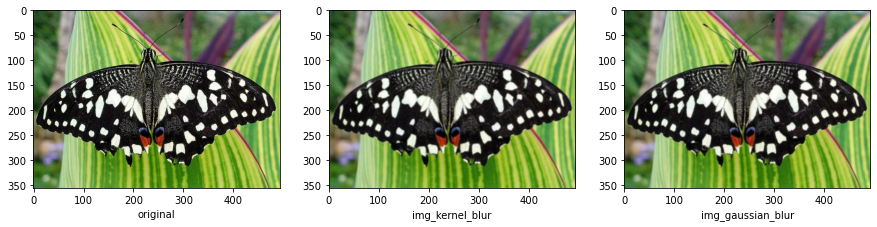

In [86]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../samples/data/butterfly.jpg')

# show_in_matplotlib(img, title="Original")

plt.figure(figsize=(15,8))

nrows = 1
ncols = 3
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img))
plt.xlabel('original')

# Try different kernels for smoothing:
kernel_blur = 1 / 9 * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])
img_kernel_blur = cv.filter2D(img, -1, kernel_blur)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_kernel_blur))
plt.xlabel('img_kernel_blur')


gaussian_blur = 1 / 16 * np.array([[1, 2, 1],
                                   [2, 4, 2],
                                   [1, 2, 1]])
img_gaussian_blur = cv.filter2D(img, -1, gaussian_blur)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_gaussian_blur))
plt.xlabel('img_gaussian_blur')


plt.show()


### Embossing

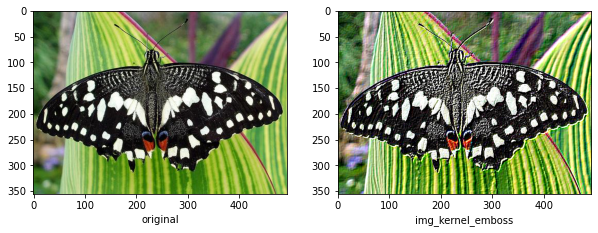

In [87]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../samples/data/butterfly.jpg')

# show_in_matplotlib(img, title="Original")

plt.figure(figsize=(10,8))

nrows = 1
ncols = 2
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img))
plt.xlabel('original')

# Try a kernel for embossing:
kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])
img_kernel_emboss = cv.filter2D(img, -1, kernel_emboss)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_kernel_emboss))
plt.xlabel('img_kernel_emboss')

# Try different kernels for edge detection:
sobel_x_kernel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

sobel_y_kernel = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

outline_kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])


plt.show()


### More Edge Detection

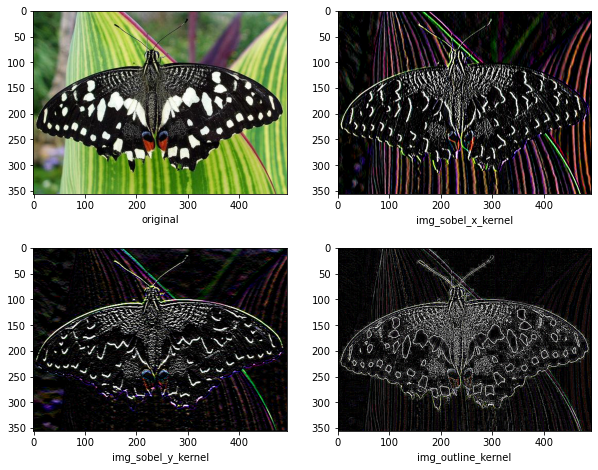

In [88]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../samples/data/butterfly.jpg')

# show_in_matplotlib(img, title="Original")

plt.figure(figsize=(10,8))

nrows = 2
ncols = 2
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img))
plt.xlabel('original')

# Try different kernels for edge detection:
sobel_x_kernel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
img_sobel_x_kernel = cv.filter2D(img, -1, sobel_x_kernel)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_sobel_x_kernel))
plt.xlabel('img_sobel_x_kernel')

sobel_y_kernel = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])
img_sobel_y_kernel = cv.filter2D(img, -1, sobel_y_kernel)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_sobel_y_kernel))
plt.xlabel('img_sobel_y_kernel')

outline_kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
img_outline_kernel = cv.filter2D(img, -1, outline_kernel)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_outline_kernel))
plt.xlabel('img_outline_kernel')


plt.show()

## Image Arithmetic

### Saturation Arithmetic  

In opencv the range of value is (0 - 255). If the aritmetic operation will result in value outside this range the values will be corrected or clipped to either 0 or 255 depending on the closest border.

Take note is arithemetic operation is carryout on undelying numpy data the value outside the border are wrapped using modulus operation.

In [98]:
import numpy as np
import cv2 as cv
x = np.uint8([215])
y = np.uint8([52])

# integer arithmetic
sum = 215 + 52
print('integer arithmetic')
print(f"215 + 52 = {sum}")

# cv add
z = cv.add(x,y)
print('\ncv add (saturation operation)')
print(f"{x} + {y} = {z}")
print(f"min( max( round({sum}), 0), 255) = {min(max(round(sum),0),255)}")

# numpy add
z = x + y
print('\nnumpy add (modulo operation)')
print(f"{x} + {y} = {z}")
print(f"{sum} % 256 = {sum % 256}")
#


integer arithmetic
215 + 52 = 267

cv add (saturation operation)
[215] + [52] = [[255]]
min( max( round(267), 0), 255) = 255

numpy add (modulo operation)
[215] + [52] = [11]
267 % 256 = 11


### Image Addition and Subtraction 

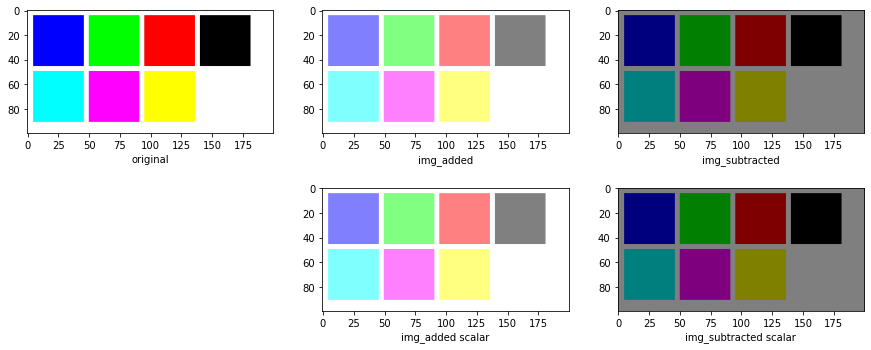

In [113]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('color_img.png')

# show_in_matplotlib(img, title="Original")

plt.figure(figsize=(15,6))

nrows = 2
ncols = 3
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img))
plt.xlabel('original')

# create array of same shape as img with values 1
M = np.ones(img.shape, dtype="uint8")
# change values to (128)
M = M * (256 // 2)

# add M
img_added = cv.add(img, M)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_added))
plt.xlabel('img_added')

# subtract M
img_subtracted = cv.subtract(img, M)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_subtracted))
plt.xlabel('img_subtracted')

# scalar
scalar = np.ones((1,3), dtype="float") * 128

# similarly add a scalar
img_added = cv.add(img, scalar)
i += 2
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_added))
plt.xlabel('img_added scalar')

# subtract scalar
img_subtracted = cv.subtract(img, scalar)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_subtracted))
plt.xlabel('img_subtracted scalar')


plt.show()

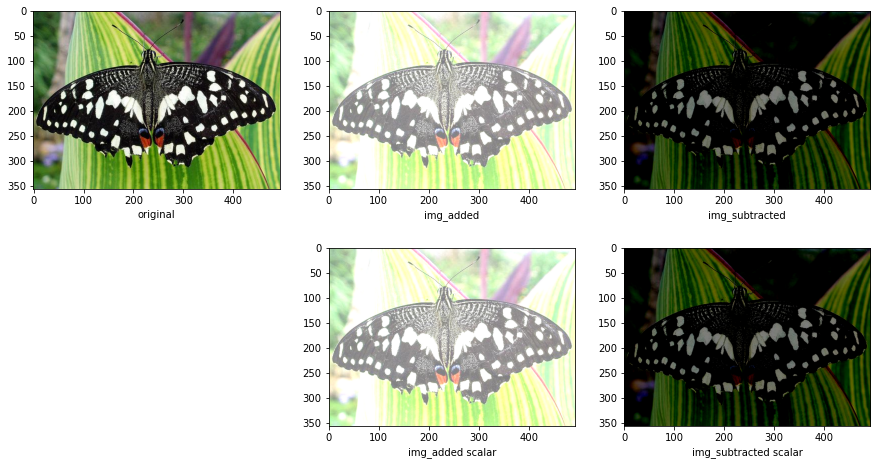

In [115]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../samples/data/butterfly.jpg')

# show_in_matplotlib(img, title="Original")

plt.figure(figsize=(15,8))

nrows = 2
ncols = 3
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img))
plt.xlabel('original')

# create array of same shape as img with values 1
M = np.ones(img.shape, dtype="uint8")
# change values to (128)
M = M * (256 // 2)

# add M
img_added = cv.add(img, M)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_added))
plt.xlabel('img_added')

# subtract M
img_subtracted = cv.subtract(img, M)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_subtracted))
plt.xlabel('img_subtracted')

# scalar
scalar = np.ones((1,3), dtype="float") * 128

# similarly add a scalar
img_added = cv.add(img, scalar)
i += 2
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_added))
plt.xlabel('img_added scalar')

# subtract scalar
img_subtracted = cv.subtract(img, scalar)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_subtracted))
plt.xlabel('img_subtracted scalar')


plt.show()

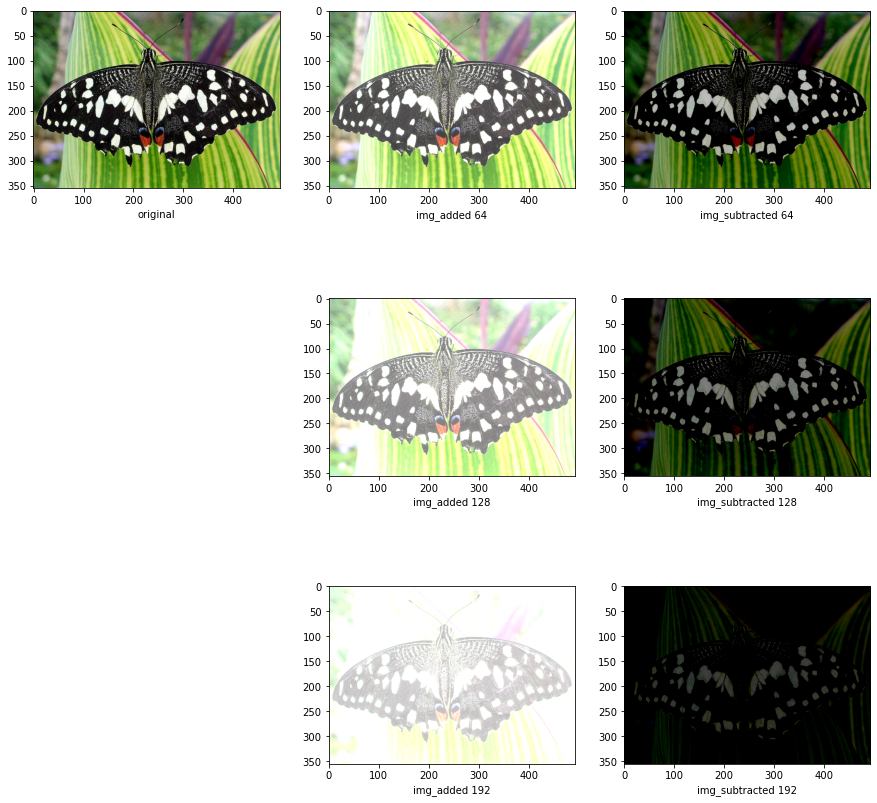

In [119]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../samples/data/butterfly.jpg')

# show_in_matplotlib(img, title="Original")

plt.figure(figsize=(15,15))

nrows = 3
ncols = 3
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img))
plt.xlabel('original')

# create array of same shape as img with values 1
M = np.ones(img.shape, dtype="uint8")

# change values to (128)
factor = (256 // 4)
M1 = M * factor

# add M
img_added = cv.add(img, M1)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_added))
plt.xlabel(f'img_added {factor}')

# subtract M
img_subtracted = cv.subtract(img, M1)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_subtracted))
plt.xlabel(f'img_subtracted {factor}')

# change values to (128)
factor = (256 // 2)
M1 = M * factor

# add M
img_added = cv.add(img, M1)
i += 2
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_added))
plt.xlabel(f'img_added {factor}')

# subtract M
img_subtracted = cv.subtract(img, M1)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_subtracted))
plt.xlabel(f'img_subtracted {factor}')

# change values to (128)
factor = (256 * 3 // 4)
M1 = M * factor

# add M
img_added = cv.add(img, M1)
i += 2
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_added))
plt.xlabel(f'img_added {factor}')

# subtract M
img_subtracted = cv.subtract(img, M1)
i += 1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_subtracted))
plt.xlabel(f'img_subtracted {factor}')


plt.show()

## Bitwise operations

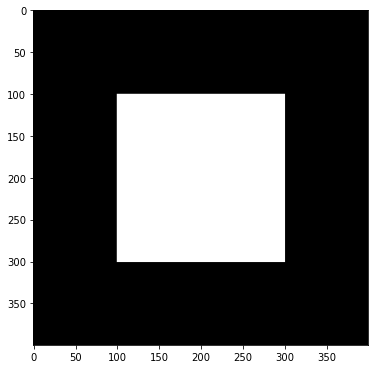

In [140]:
import cv2 as cv

# create img
box = create_canvas(400, 400, (0,0,0))
cv.rectangle(box, (100,100), (300,300), (255,255,255), -1)
cv.imwrite('box1.png', box)

show_in_matplotlib(box)

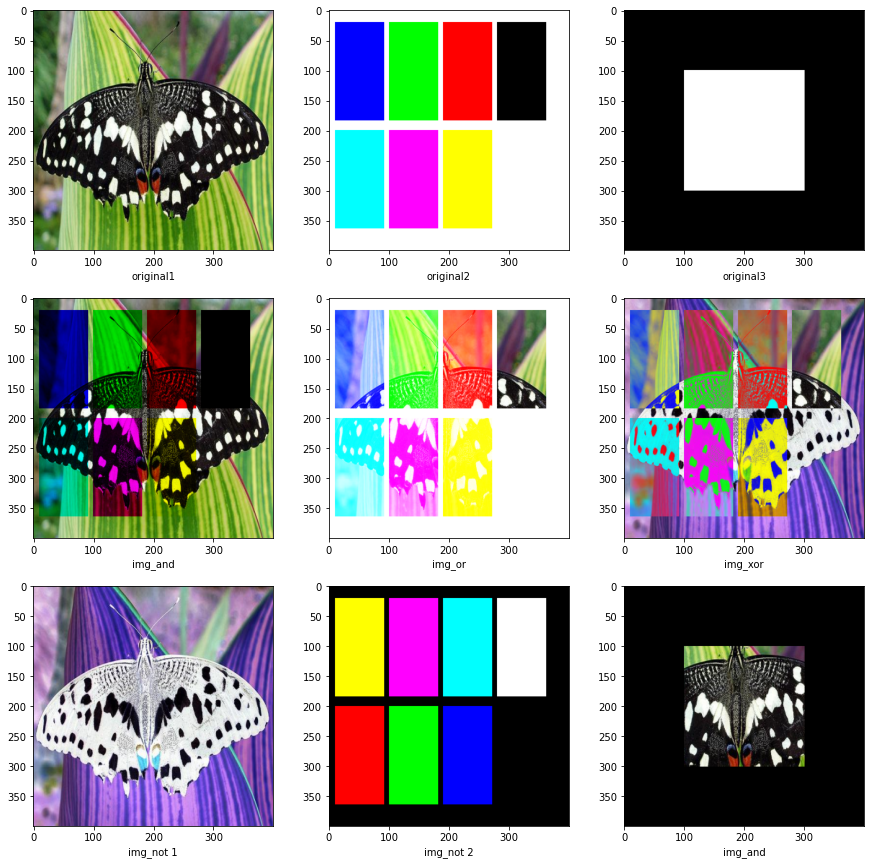

In [141]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('../samples/data/butterfly.jpg')
img1 = cv.resize(img1, (400, 400), interpolation=cv.INTER_AREA)
img2 = cv.imread('color_img.png')
img2 = cv.resize(img2, (400, 400), interpolation=cv.INTER_AREA)
img3 = cv.imread('box1.png')

# show_in_matplotlib(img, title="Original")

plt.figure(figsize=(15,15))

nrows = 3
ncols = 3
plt.xticks([])
plt.yticks([])
plt.grid(False)

# original
i=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img1))
plt.xlabel('original1')

i+=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img2))
plt.xlabel('original2')

i+=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img3))
plt.xlabel('original3')

# AND
img_and = cv.bitwise_and(img1, img2)
i +=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_and))
plt.xlabel('img_and')

# OR
img_or = cv.bitwise_or(img1, img2)
i +=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_or))
plt.xlabel('img_or')

# XOR
img_xor = cv.bitwise_xor(img1, img2)
i +=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_xor))
plt.xlabel('img_xor')

# NOT
img_not = cv.bitwise_not(img1)
i +=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_not))
plt.xlabel('img_not 1')

# NOT
img_not = cv.bitwise_not(img2)
i +=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_not))
plt.xlabel('img_not 2')

# AND
img_and = cv.bitwise_and(img1, img3)
i +=1
plt.subplot(nrows,ncols,i)
plt.imshow(toRGB(img_and))
plt.xlabel('img_and')





plt.show()

## Construction and building Histogram 
